<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


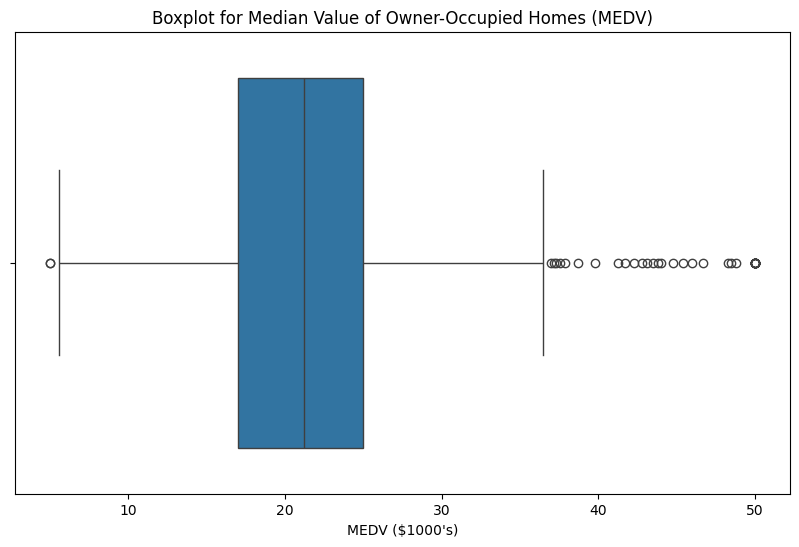

we can see this distributions has lots of outliers on right end of the distribution


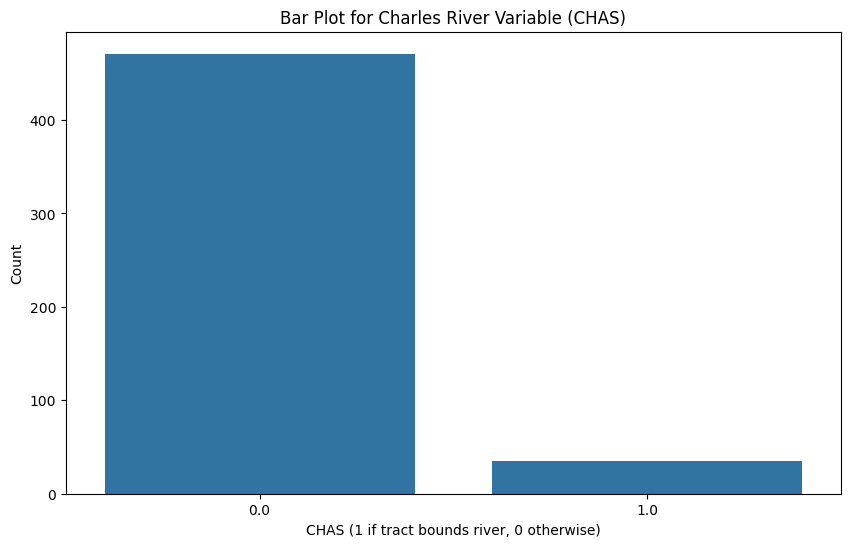

we can see that most of the data are not bounding rivers (1 if tract bounds river; 0 otherwise)


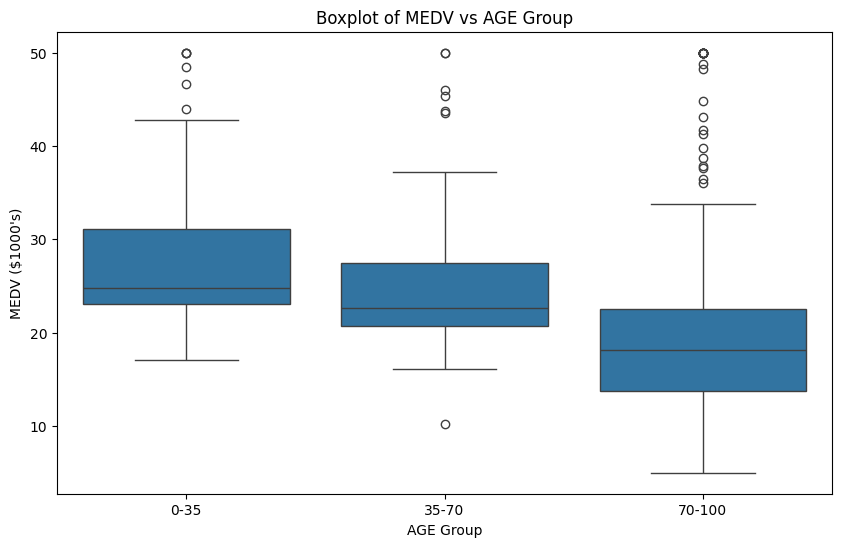

we can see from this boxplot for the MEDV variable vs the AGE variable that MEDV decreases with age


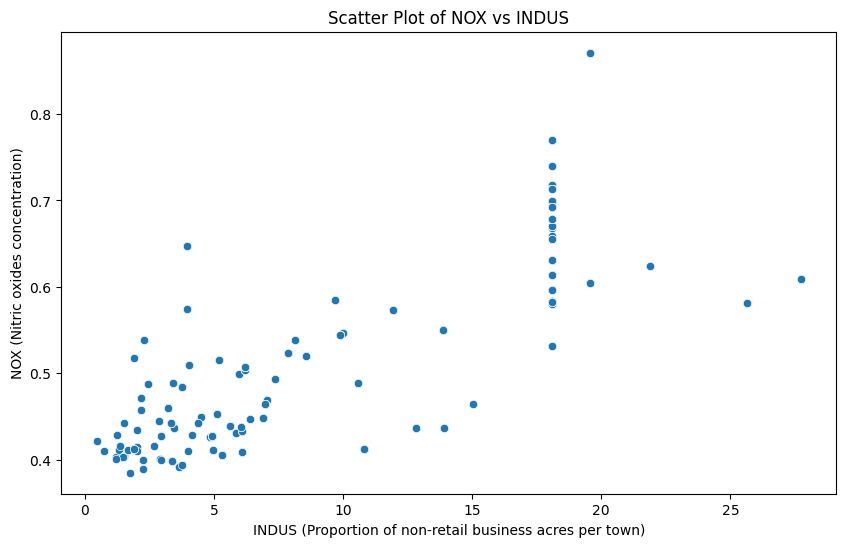

this scatterplot does not suggest a high correlation and potentially we have some wrong entries in the data as we are spotting a dsuspicius vertical column of dots


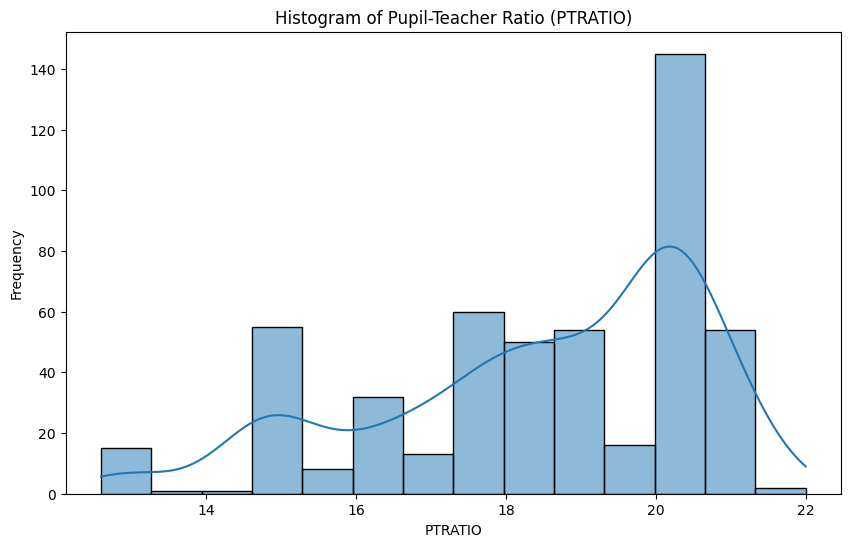

the histogram for the pupil to teacher ratio variable (one of the key measurements of quality education)


In [13]:

# Boxplot for the Median value of owner-occupied homes (MEDV)
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot for Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000\'s)')
plt.show()
print("we can see this distributions has lots of outliers on right end of the distribution")


# Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot for Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 if tract bounds river, 0 otherwise)')
plt.ylabel('Count')
plt.show()
print("we can see that most of the data are not bounding rivers (1 if tract bounds river; 0 otherwise)")

# Discretize AGE variable
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70-100'])

# Boxplot for MEDV vs AGE_Group
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_Group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000\'s)')
plt.show()
print("we can see from this boxplot for the MEDV variable vs the AGE variable that MEDV decreases with age")


# Scatter plot for Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('INDUS (Proportion of non-retail business acres per town)')
plt.ylabel('NOX (Nitric oxides concentration)')
plt.show()
print("this scatterplot does not suggest a high correlation and potentially we have some wrong entries in the data as we are spotting a dsuspicius vertical column of dots")

# Histogram for the pupil-teacher ratio variable (PTRATIO)
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()
print("the histogram for the pupil to teacher ratio variable (one of the key measurements of quality education)")



In [11]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming the DataFrame is named boston_df)
# boston_df = pd.read_csv('your_dataset.csv')

# 1. T-test for independent samples (Charles River)
# Hypothesis:
# H0: There is no significant difference in median value of houses bounded by the Charles river (CHAS=1) or not (CHAS=0)
# H1: There is a significant difference in median value of houses bounded by the Charles river (CHAS=1) or not (CHAS=0)

chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = stats.ttest_ind(chas_0, chas_1)

print(f"T-test for independent samples (Charles River)")
print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles river.")

# 2. ANOVA (AGE groups)
# Hypothesis:
# H0: There is no difference in median values of houses (MEDV) across different AGE groups.
# H1: There is a difference in median values of houses (MEDV) across different AGE groups.

# Discretize AGE variable
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70-100'])

anova_result = stats.f_oneway(boston_df[boston_df['AGE_Group'] == '0-35']['MEDV'],
                              boston_df[boston_df['AGE_Group'] == '35-70']['MEDV'],
                              boston_df[boston_df['AGE_Group'] == '70-100']['MEDV'])

print(f"\nANOVA (AGE groups)")
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis. There is a difference in median values of houses (MEDV) across different AGE groups.")
else:
    print("Fail to reject the null hypothesis. There is no difference in median values of houses (MEDV) across different AGE groups.")

# 3. Pearson Correlation (NOX and INDUS)
# Hypothesis:
# H0: There is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).
# H1: There is a relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

corr_coef, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"\nPearson Correlation (NOX and INDUS)")
print(f"Correlation Coefficient: {corr_coef}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. There is a relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between NOX and INDUS.")

# 4. Regression analysis (DIS and MEDV)
# Hypothesis:
# H0: There is no relationship between weighted distances to the five Boston employment centres (DIS) and median value of owner-occupied homes (MEDV).
# H1: There is a relationship between weighted distances to the five Boston employment centres (DIS) and median value of owner-occupied homes (MEDV).

# Add a constant to the independent variable
X = sm.add_constant(boston_df['DIS'])
Y = boston_df['MEDV']

# Fit the regression model
model = sm.OLS(Y, X).fit()

print(f"\nRegression Analysis (DIS and MEDV)")
print(model.summary())

# Interpretation
if model.pvalues['DIS'] < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between DIS and MEDV.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between DIS and MEDV.")


T-test for independent samples (Charles River)
T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.

ANOVA (AGE groups)
F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a difference in median values of houses (MEDV) across different AGE groups.

Pearson Correlation (NOX and INDUS)
Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis. There is a relationship between NOX and INDUS.

Regression Analysis (DIS and MEDV)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Jul 2